In [1]:
#import all the needed libiraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
#read the csv file
df = pd.read_csv(r"D:/Fixed Solutions intern/Project1/train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
#data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
#all columns we have
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
#the shape before removing the rows of null values
df.shape

(550068, 12)

In [6]:
#the percentage of missing values
missing_data_count= df.isnull().sum().sum()
all_data_count = np.product(df.shape)
(missing_data_count/all_data_count)*100

8.436608443562129

In [7]:
#the number of missing values of each coulmn
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
#drop these two columns as they have a large number of missing values
df.drop(['Product_Category_2', 'Product_Category_3'], axis=1,inplace=True)

In [9]:
#After removing the two columns
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [10]:
#the shape After removing the columns of null values
df.shape

(550068, 10)

array([<AxesSubplot:ylabel='Purchase'>], dtype=object)

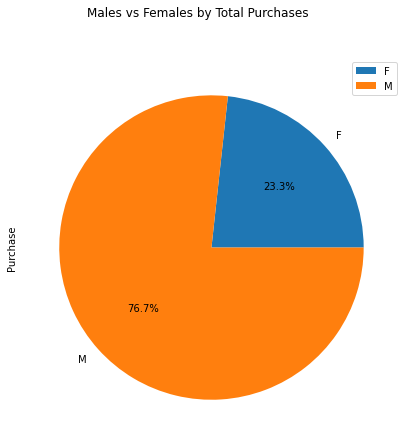

In [11]:
#visualize males and females by Total Purchases  
gender_pu=df[['Gender','Purchase']].groupby('Gender').sum()
gender_pu
gender_pu.plot(kind='pie',autopct='%1.1f%%',subplots=True,figsize=(15,7),title='Males vs Females by Total Purchases')

<AxesSubplot:xlabel='City_Category'>

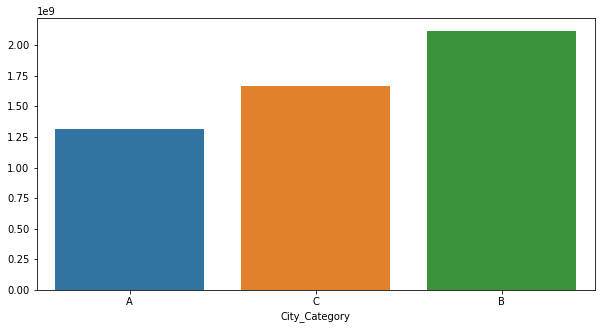

In [12]:
#visualize the total purchase by city
plt.figure(figsize= (10,5))
nat_groups = df.groupby('City_Category')['Purchase'].sum().sort_values()[-10:]
nat_groups
sns.barplot(x=nat_groups.index,y= nat_groups.values)

<AxesSubplot:xlabel='Age'>

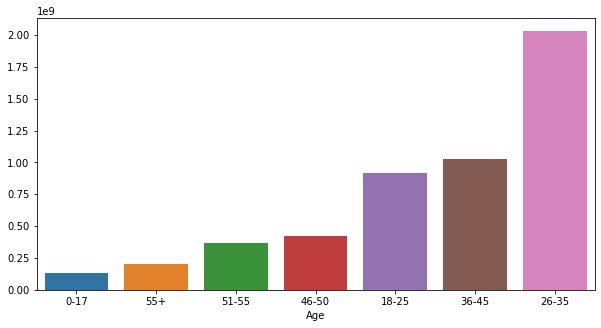

In [13]:
#visualize the total purchase by Age
plt.figure(figsize= (10,5))
nat_groups = df.groupby('Age')['Purchase'].sum().sort_values()[-10:]
nat_groups
sns.barplot(x=nat_groups.index,y= nat_groups.values)

array([<AxesSubplot:>], dtype=object)

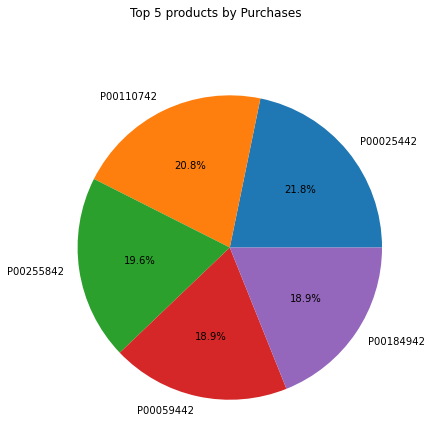

In [14]:
#visualize top five products by Purchases
top_prod=df[['Product_ID','Purchase']].groupby('Product_ID').sum()
top_prod=top_prod.sort_values(by='Purchase',ascending=False)
top_prod=top_prod.head(5)
top_prod.plot(kind='pie',title='Top 5 products by Purchases',subplots=True,autopct='%1.1f%%',legend=False,ylabel='',figsize=(15,7))

In [15]:
#copy the data to make the model on it
df2=df.copy()

In [16]:
#convert data types to integer to use it in the model
a = {'M': 0, 'F': 1}
df2['Gender'] = df['Gender'].map(a)
b = {'0-17': 0, '18-25': 1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
df2['Age'] = df['Age'].map(b)
c = {'A': 0, 'B': 1, 'C':2}
df2['City_Category'] = df['City_Category'].map(c)
d = {'0': 0, '1': 1, '2':2, '3':3, '4+':4}
df2['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map(d)

In [18]:
#data types of the data
df2.dtypes

User_ID                        int64
Product_ID                    object
Gender                         int64
Age                            int64
Occupation                     int64
City_Category                  int64
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category_1             int64
Purchase                       int64
dtype: object

In [17]:
#applying RandomForestRegressor model
features = ['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1']

X = df2[features]
y = df2['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 100)

rfr = RandomForestRegressor()

rfr.fit(X_train,y_train)

y_predict= rfr.predict(X_test)

print("Accuracy:", r2_score(y_test, y_predict)*100)

Accuracy: 66.71836942299592
